### Importar dependencias

Lo primero sería importar tensorflow y preparar el dataset ```MNIST```, para ello vamos a acceder al módulo mnist. Tensorflow tiene una gran variedad de datos cagtalogo para entrenar nuestros modelos.

In [10]:
import tensorflow as tf 
mnist = tf.keras.datasets.mnist

### Establecer los datos de entrenamiento

Al igual de en el ejemplo anterior, el siguiente paso será establecer los datos para entrenamiento y test, en este caso convertiremos los datos de enteros a numeros con coma flotante:

*Los valores de MNIST están entre 0 y 255, al dividirlos, convertimos los valores entre 0 y 1, que esto ayuda a los modelos a procesar mejor los valores y cafilita el entrenamiento.

In [8]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [9]:
# Muestra la primera fila del tensor de entrenamiento, en forma de matriz, que corresponde a un arreglo largo con 784 valores entre 0 y 1.
# (los pixeles de la imagen)
print(x_train[:1])
print("=====================")

# Muestra el número real que representa la observación.
print(y_train[:1])

[[[0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.        ]
  [0.         0.         0.         0.         0.         0.
   0.         0.         0.         0.         0.         0.
  

### Crear el modelo

Ahora construiremos el modelo con la API ```tf..keras.sequiential```, como podemos observar, podemos declarar las capas en variables o directamente instanciarlas en la propia declaración del modelo. Elegiremos un optimizador y una función de perdida.

In [13]:
l0 = tf.keras.layers.Flatten(input_shape=(28, 28))
l1 = tf.keras.layers.Dense(128, activation='relu')

model = tf.keras.models.Sequential([
    l0,
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

### Explicación de cada capa:

#### Flatten(input_shape=(28, 28))

In [14]:
model_2 = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10)
])

d:\Documentos\Trabajos\Laboratorios\DeepLearningMNIST\mnist\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
l0 = tf.keras.layers.Flatten(input_shape=(28, 28))
l1 = tf.keras.layers.Dense(128, activation='relu')
l2 = tf.keras.layers.Dropout(0.2)
l3 = tf.keras.layers.Dense(10)

model_3 = tf.keras.models.Sequential([
    l0,
    l1,
    l2,
    l3
])

d:\Documentos\Trabajos\Laboratorios\DeepLearningMNIST\mnist\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [18]:
for index, layer in enumerate(model.layers):
    print(f"-------------{index}------------")
    print(layer.name)
    print(layer.weights)
    print(layer.trainable)
    print(f"---------------------------------")

-------------0------------
flatten_2
[]
True
---------------------------------
-------------1------------
dense_5
[<Variable path=sequential_1/dense_5/kernel, shape=(784, 128), dtype=float32, value=[[ 0.02231704 -0.07661022 -0.00691184 ...  0.05079893  0.06592857
  -0.08027692]
 [-0.01587829 -0.08076361  0.02577973 ...  0.01025181 -0.05766795
  -0.04020813]
 [ 0.02306931 -0.04719964 -0.03761044 ... -0.03097036  0.01205691
  -0.02106689]
 ...
 [-0.00418682 -0.0201262   0.03462522 ... -0.02941212 -0.0224354
   0.04618942]
 [ 0.0676524  -0.08063526  0.02854183 ... -0.04793491  0.04459163
  -0.03342882]
 [ 0.05885109 -0.01679906 -0.04826323 ...  0.05865923 -0.04581556
  -0.05470975]]>, <Variable path=sequential_1/dense_5/bias, shape=(128,), dtype=float32, value=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 

In [20]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

### Función de perdida

![Función de perdida](https://github.com/lucferbux/Curso-Nivelador-IA/assets/16117276/d99b6ecf-0894-4d12-9dba-acf5fce46cb6)

La [función de perdida](https://developers.google.com/machine-learning/crash-course/descending-into-ml/training-and-loss) `losses.SparseCategoricalCrossentropy` coge un vector de logits y un Indice `True` y devuelve una perdida escalar por cada ejemplo.

In [21]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [22]:
predictons = model(x_train[:1]).numpy()
predictons

array([[ 0.2723285 ,  0.10958193, -0.44798145, -0.20691292, -0.47080386,
         0.01431476,  0.18061742,  0.29694232,  0.4989854 ,  0.0994199 ]],
      dtype=float32)

La función ```tf.nn.softmax``` convierte estos logits en probabilidades para cada clase.

**Básicamente estas predicciones no normalizadas son convertidas en predicciones reales mediante esta función**

$$ \sigma(z_i) = \frac{e^{z_{i}}}{\sum_{j=1}^K e^{z_{j}}} \ \ \ for\ i=1,2,\dots,K $$

In [23]:
tf.nn.softmax(predictons).numpy()

array([[0.12140682, 0.10317233, 0.05907673, 0.07518154, 0.05774374,
        0.09379704, 0.1107678 , 0.12443219, 0.15229265, 0.1021292 ]],
      dtype=float32)

In [24]:
loss_fn(y_train[:1], predictons).numpy()

np.float32(2.366622)

In [25]:
-tf.math.log(1/10).numpy()

np.float32(2.3025851)

In [26]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [28]:
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9139 - loss: 0.2963
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9581 - loss: 0.1439
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9675 - loss: 0.1085
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9728 - loss: 0.0887
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9771 - loss: 0.0741


In [29]:
for index, layer in enumerate(model.layers):
    print(f"-----------------{index}---------------")
    print(layer.name)
    print(layer.weights)
    print(layer.trainable)
    print(f"--------------------------------------------")

-----------------0---------------
flatten_2
[]
True
--------------------------------------------
-----------------1---------------
dense_5
[<Variable path=sequential_1/dense_5/kernel, shape=(784, 128), dtype=float32, value=[[ 0.02231704 -0.07661022 -0.00691184 ...  0.05079893  0.06592857
  -0.08027692]
 [-0.01587829 -0.08076361  0.02577973 ...  0.01025181 -0.05766795
  -0.04020813]
 [ 0.02306931 -0.04719964 -0.03761044 ... -0.03097036  0.01205691
  -0.02106689]
 ...
 [-0.00418682 -0.0201262   0.03462522 ... -0.02941212 -0.0224354
   0.04618942]
 [ 0.0676524  -0.08063526  0.02854183 ... -0.04793491  0.04459163
  -0.03342882]
 [ 0.05885109 -0.01679906 -0.04826323 ...  0.05865923 -0.04581556
  -0.05470975]]>, <Variable path=sequential_1/dense_5/bias, shape=(128,), dtype=float32, value=[-0.09174935 -0.00710357 -0.08677626 -0.03076402 -0.03715217 -0.09568923
  0.04079936 -0.07041842 -0.00945838 -0.05998806  0.10376351 -0.10096909
 -0.10346204 -0.04789935  0.07827189 -0.13586575  0.10578011 

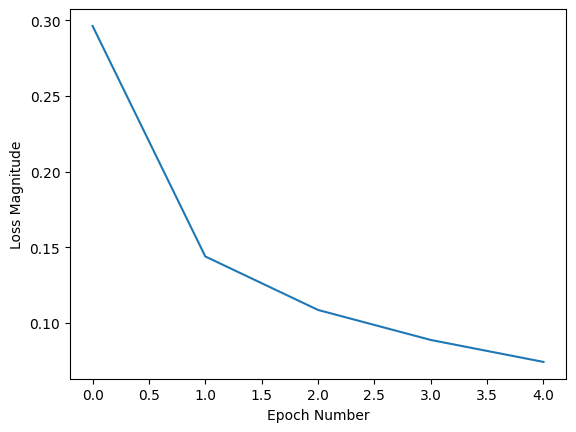

In [33]:
import matplotlib.pyplot as plt
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])

In [34]:
predictons_trained = model(x_test[:1]).numpy()
print(predictons_trained)
print(y_test[:1])

[[ -5.847296   -6.7738366   0.9945875   1.0294294 -14.6601925  -3.7708366
  -16.120432   13.596555   -5.418949   -2.3567624]]
[7]


In [35]:
tf.nn.softmax(predictons_trained).numpy()

array([[3.5945094e-09, 1.4231420e-09, 3.3653662e-06, 3.4846873e-06,
        5.3486870e-13, 2.8670462e-08, 1.2418618e-13, 9.9999309e-01,
        5.5165690e-09, 1.1791232e-07]], dtype=float32)

In [36]:
loss_fn_trained = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [37]:
loss_fn_trained(y_test[:1], predictons_trained).numpy()

np.float32(6.9141147e-06)

In [38]:
model.evaluate(x_test, y_test, verbose=2)

313/313 - 0s - 1ms/step - accuracy: 0.9783 - loss: 0.0746


[0.07463160157203674, 0.9782999753952026]

In [44]:
# Sequencial API
import tensorflow as tf
from tensorflow.keras.models import Sequential

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

sequential_model = Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

sequential_model.compile(optimizer='adam',
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])

sequential_model.fit(x_train, y_train, epochs=5)
sequential_model.evaluate(x_test, y_test)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9146 - loss: 0.2945
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9574 - loss: 0.1430
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9671 - loss: 0.1089
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9730 - loss: 0.0887
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9750 - loss: 0.0766
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - accuracy: 0.9765 - loss: 0.0773


[0.07729699462652206, 0.9764999747276306]

### API Functional

La API ```Functinoal``` es el método más popular de construir modelos en **Keras**. Puede hacer todo lo que hace la API ```Sequential``` y además permite múltiples entradas y salidas, ramificaciones y compartir capas. Es un método bastante sencillo y aún así permite una gran personalización y flexibilidad.

En este vamos a definir la entrada de forma separada y luego crear un objeto saldia añadiendo todas las capas, para luego pasarselo al objeto ```Model```

```Python
inputs = Input(shape=(28, 28))
x = Flatten()(inputs)
x = Dense(256, "Rrelu")(x)
outputs = Dense(10, "softmax")(x)

model = Model(inputs=inputs, outputs=outputs, name="mnist_model")
```

In [ ]:
# Functional API
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras import Input
from tensorflow.keras import Model

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
